<a href="https://colab.research.google.com/github/asmaa158/healthcare-dataset-stroke-data/blob/main/healthcare-dataset-stroke-data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving healthcare-dataset-stroke-data.csv to healthcare-dataset-stroke-data.csv


In [ ]:
#Read Csv file
df = pd.read_csv('healthcare-dataset-stroke-data.csv',encoding='latin-1')

In [ ]:
df.drop(['id'],axis=1,inplace=True)

In [ ]:
print(np.unique(df['gender']),np.unique(df['work_type']),np.unique(df['Residence_type']),np.unique(df['smoking_status']),np.unique(df['ever_married']))

['Female' 'Male' 'Other'] ['Govt_job' 'Never_worked' 'Private' 'Self-employed' 'children'] ['Rural' 'Urban'] ['Unknown' 'formerly smoked' 'never smoked' 'smokes'] ['No' 'Yes']


In [ ]:
df.duplicated()


0       False
1       False
2       False
3       False
4       False
        ...  
5105    False
5106    False
5107    False
5108    False
5109    False
Length: 5110, dtype: bool

In [ ]:
#df=pd.get_dummies(df,columns=['gender','work_type','Residence_type','smoking_status'],drop_first=True)
from sklearn.preprocessing import LabelEncoder

In [ ]:
enc = LabelEncoder()

In [ ]:
df['gender'] = enc.fit_transform(df['gender'].values)
df['ever_married'] = enc.fit_transform(df['ever_married'].values)
df['work_type'] = enc.fit_transform(df['work_type'].values)
df['Residence_type'] = enc.fit_transform(df['Residence_type'].values)
df['smoking_status'] = enc.fit_transform(df['smoking_status'].values)

In [ ]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,0,79.0,1,0,1,3,0,174.12,24.000000,2,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   int64  
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   int64  
 5   work_type          5110 non-null   int64  
 6   Residence_type     5110 non-null   int64  
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   int64  
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(8)
memory usage: 439.3 KB


In [ ]:
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [ ]:
df['bmi'].mean()

28.893236911794663

In [ ]:
df['bmi']=df['bmi'].fillna(df['bmi'].mean())

In [ ]:
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [ ]:
df['heart_disease'].value_counts()

0    4834
1     276
Name: heart_disease, dtype: int64

In [ ]:
df['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [ ]:
X=df.drop('stroke',axis=1)

In [ ]:
y=df['stroke']

Text(0.5, 0, 'Age')

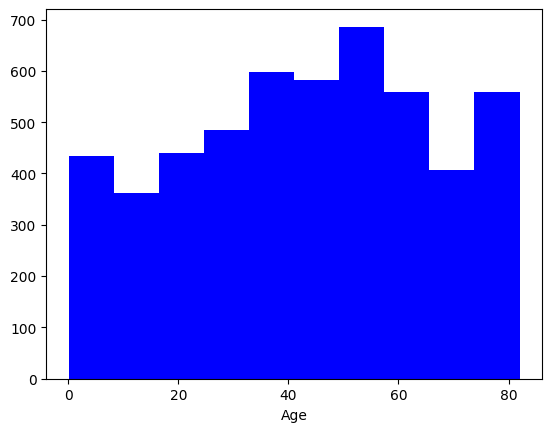

In [ ]:
plt.hist(df['age'],color='blue')
plt.xlabel("Age")

Text(0.5, 0, 'avg_glucose_level')

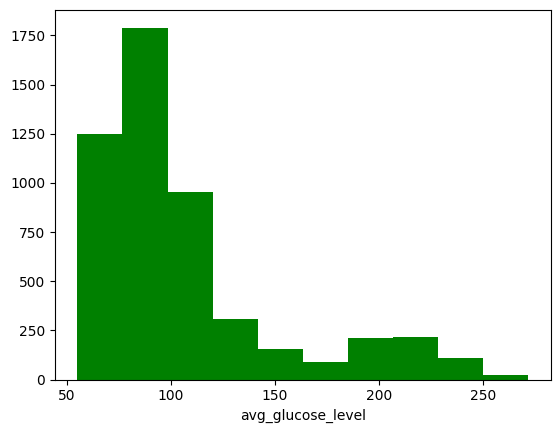

In [ ]:
plt.hist(df['avg_glucose_level'],color='green')
plt.xlabel("avg_glucose_level")

Text(0.5, 0, 'bmi')

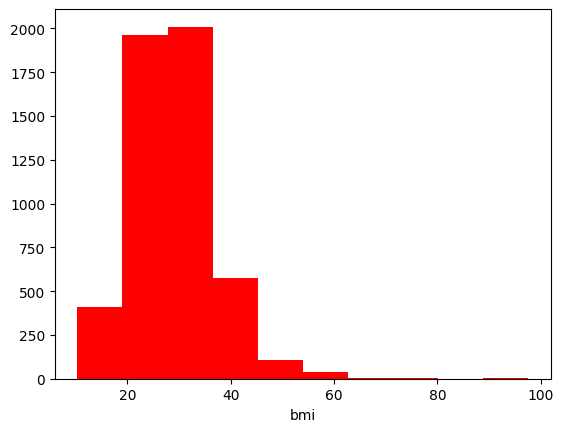

In [ ]:
plt.hist(df['bmi'],color='red')
plt.xlabel("bmi")

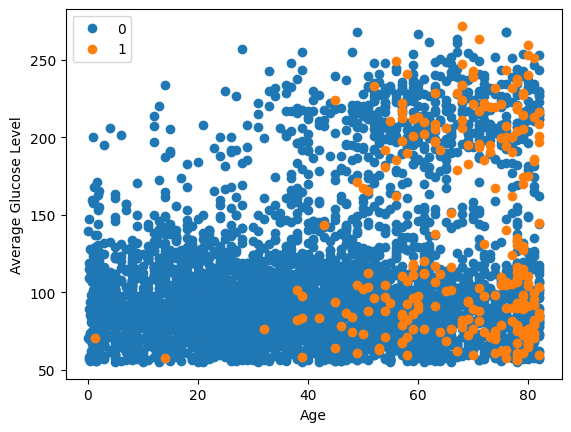

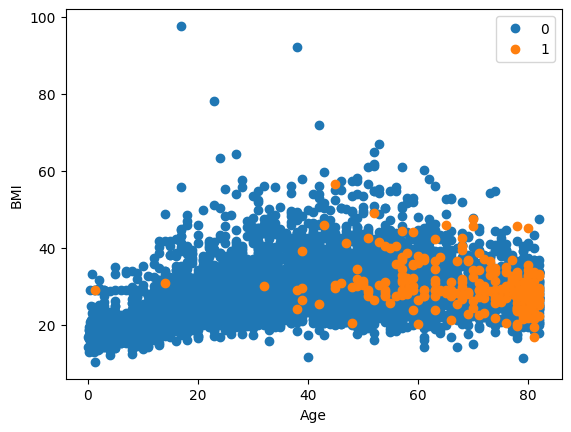

In [ ]:
groups = df.groupby("stroke")
for name, group in groups:
    plt.plot(group["age"], group["avg_glucose_level"], marker="o", linestyle="", label=name)
plt.legend()
plt.xlabel("Age")
plt.ylabel("Average Glucose Level")
plt.show()
groups = df.groupby("stroke")
for name, group in groups:
    plt.plot(group["age"], group["bmi"], marker="o", linestyle="", label=name)
plt.legend()
plt.xlabel("Age")
plt.ylabel("BMI")
plt.show()

Text(0.5, 1.0, 'Number of Male/Female in the dataset')

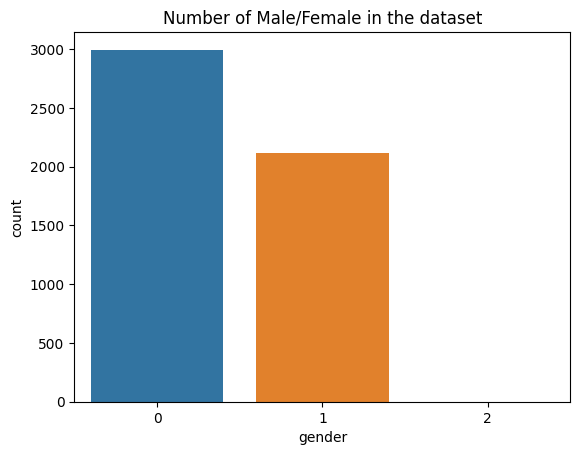

In [ ]:
sns.countplot(x='gender', data=df)
plt.title("Number of Male/Female in the dataset")

In [ ]:
plt.show()

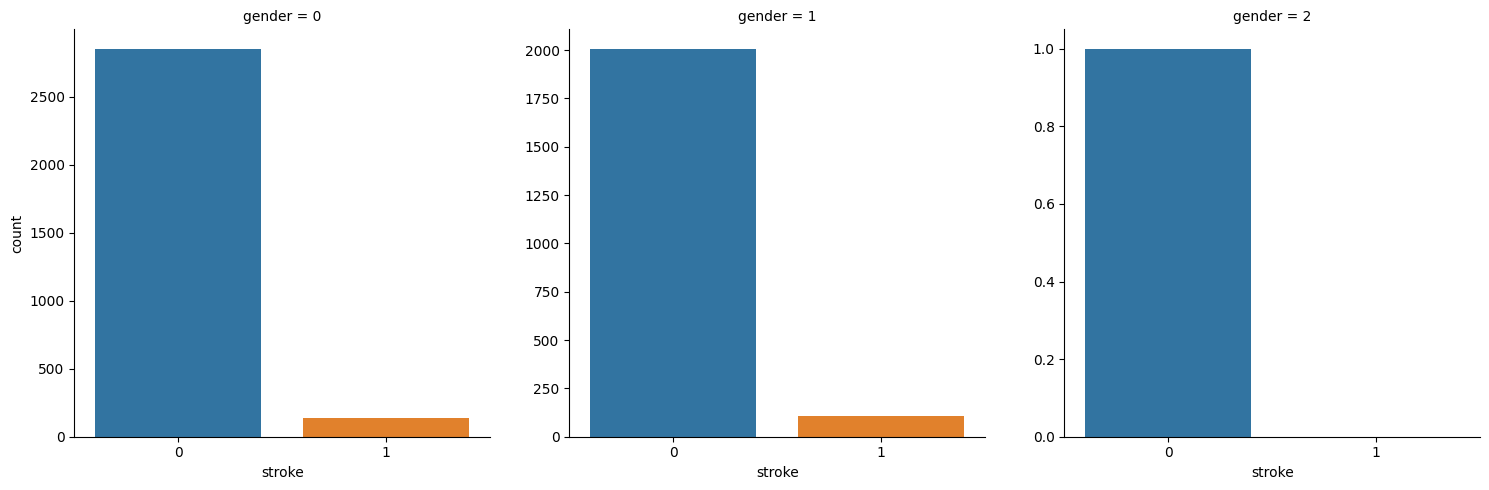

In [ ]:
sns.catplot (x='stroke', col='gender', kind='count', data=df, sharey=False)
plt.show()

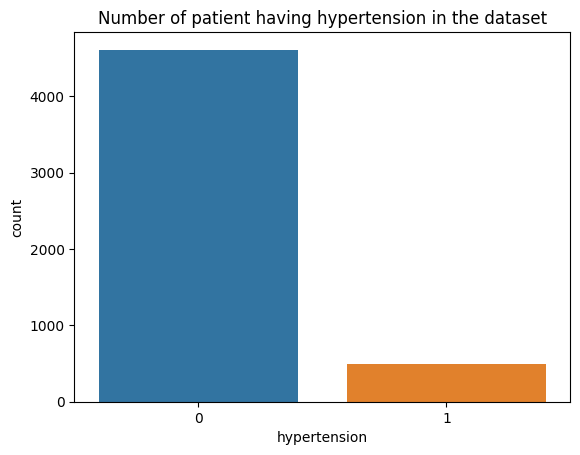

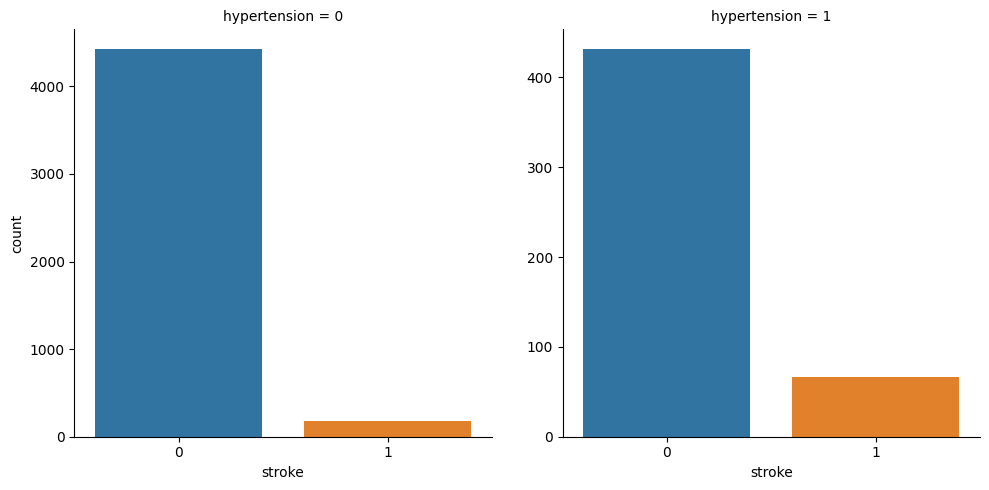

In [ ]:
sns.countplot(x='hypertension', data=df)
plt.title("Number of patient having hypertension in the dataset")
plt.show()
sns.catplot (x='stroke', col='hypertension', kind='count', data=df, sharey=False)
plt.show()

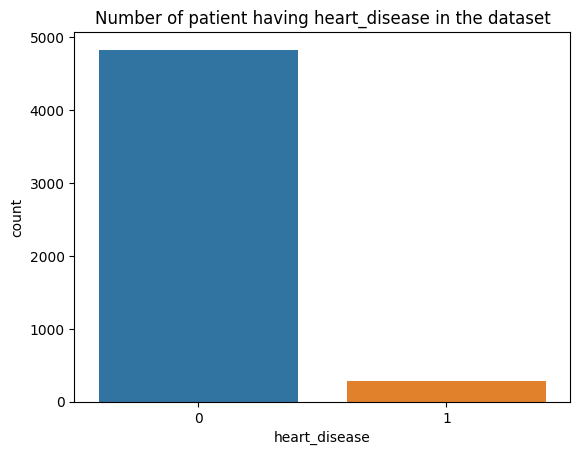

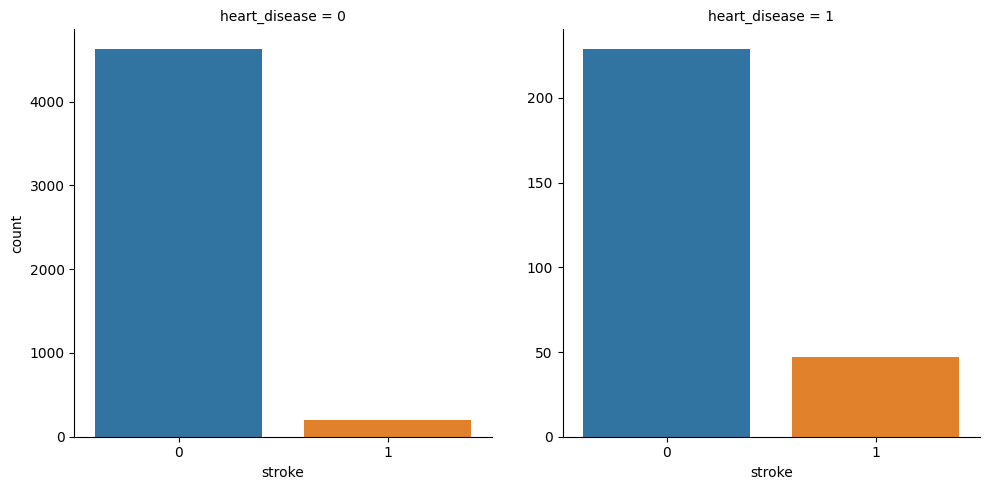

In [ ]:
sns.countplot(x='heart_disease', data=df)
plt.title("Number of patient having heart_disease in the dataset")
plt.show()
sns.catplot (x='stroke', col='heart_disease', kind='count', data=df, sharey=False)
plt.show()

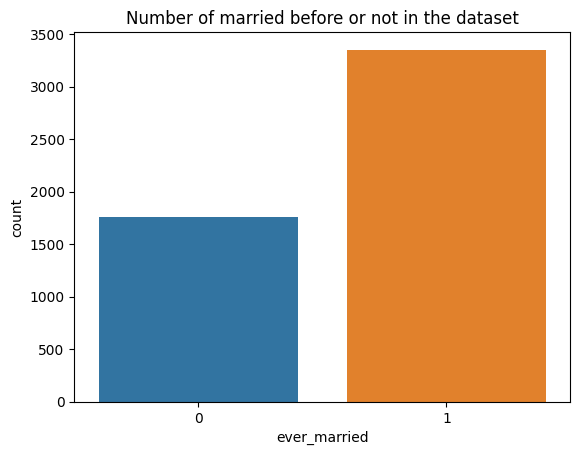

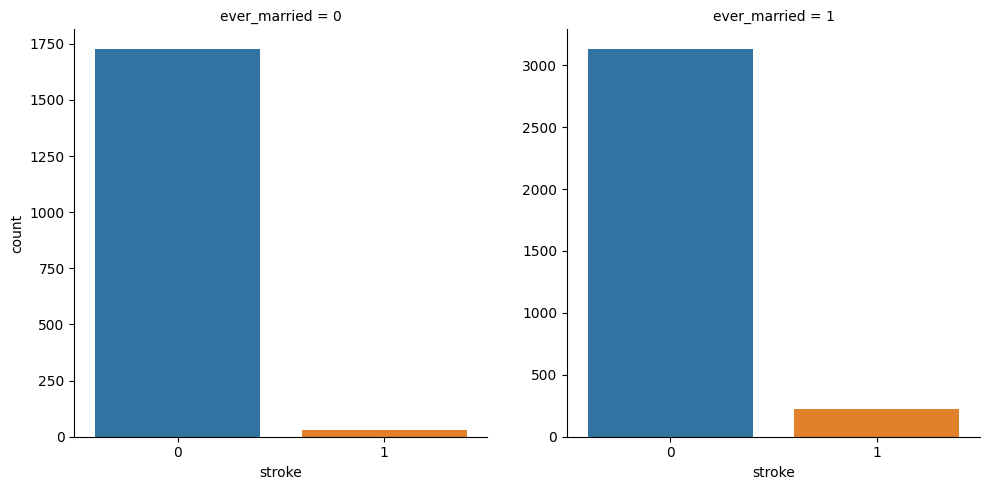

In [ ]:
sns.countplot(x='ever_married', data=df)
plt.title("Number of married before or not in the dataset")
plt.show()

sns.catplot (x='stroke', col='ever_married', kind='count', data=df, sharey=False)
plt.show()

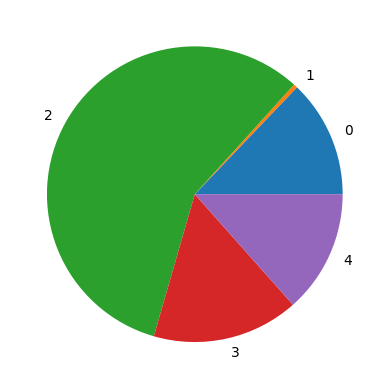

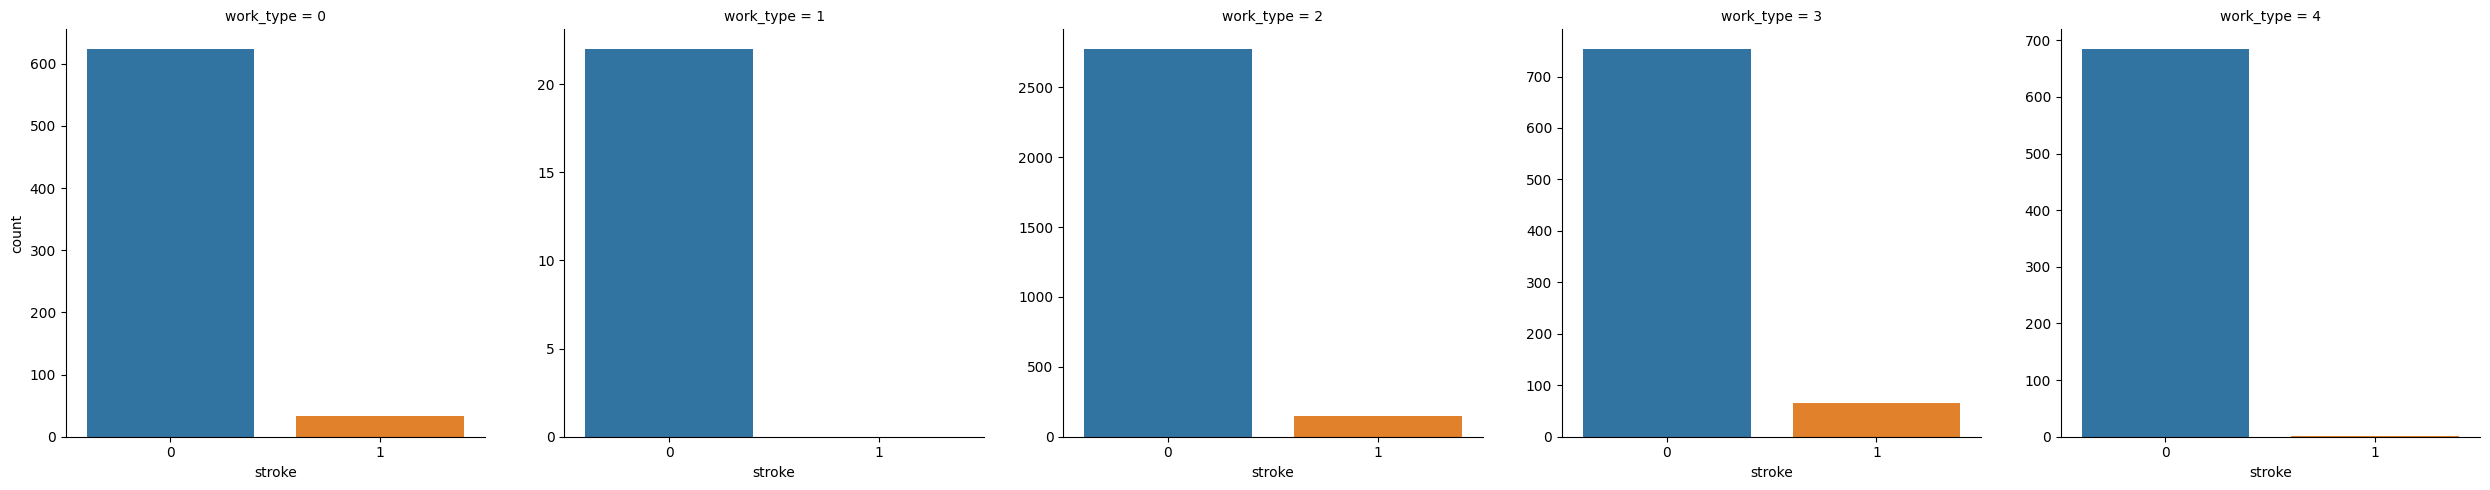

In [ ]:
df.groupby('work_type').size().plot(kind='pie')
sns.catplot (x='stroke', col='work_type', kind='count', data=df, sharey=False)
plt.show()

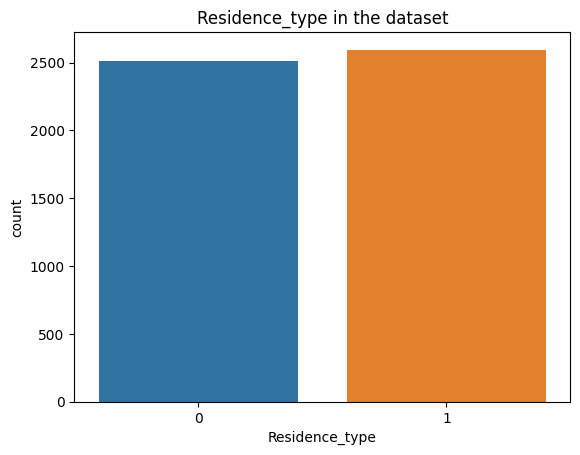

In [ ]:
sns.countplot(x='Residence_type', data=df)
plt.title("Residence_type in the dataset")
plt.show()

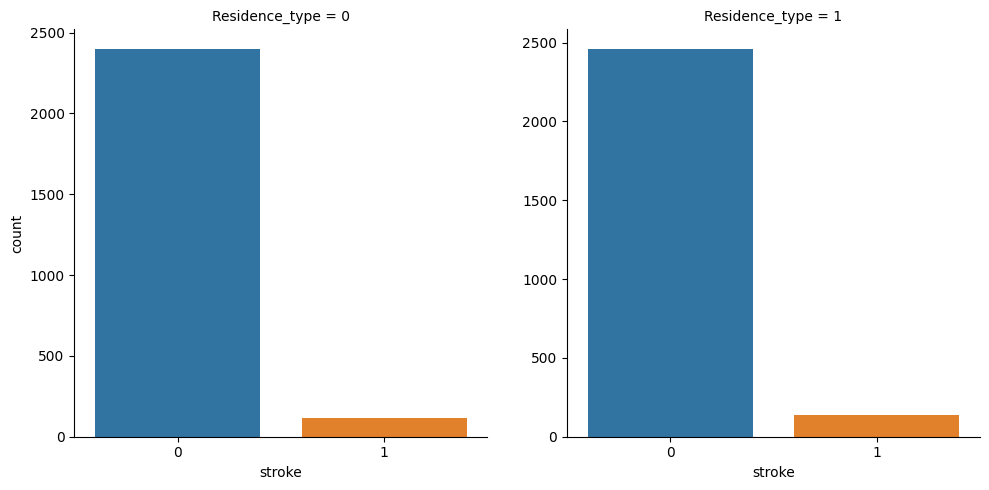

In [ ]:
sns.catplot (x='stroke', col='Residence_type', kind='count', data=df, sharey=False)
plt.show()

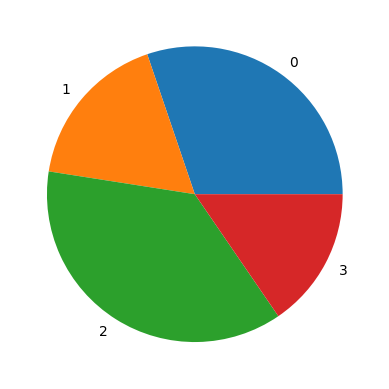

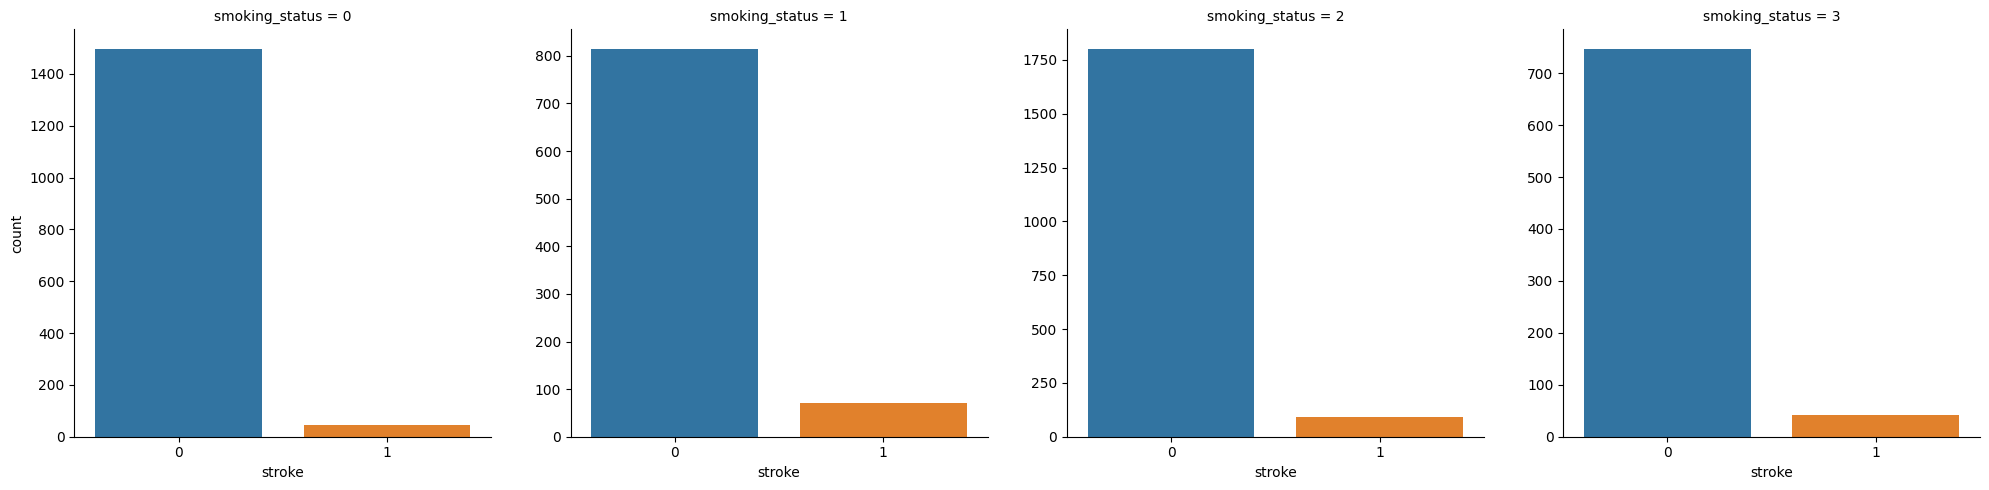

In [ ]:
df.groupby('smoking_status').size().plot(kind='pie')
sns.catplot (x='stroke', col='smoking_status', kind='count', data=df, sharey=False)
plt.show()

In [ ]:
X=df.drop('stroke',axis=1)

In [ ]:
y=df['stroke']

In [ ]:
print(X.shape,y.shape)

(5110, 10) (5110,)


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=22)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dtc=DecisionTreeClassifier()

In [ ]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
preds=dtc.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score

In [ ]:
confusion_matrix(preds,y_test)

array([[1380,   67],
       [  65,   21]])

In [ ]:
print("accuracy: ",accuracy_score(y_test,preds))

accuracy:  0.913894324853229


In [ ]:
print(classification_report(preds,y_test))

              precision    recall  f1-score   support

           0       0.96      0.95      0.95      1447
           1       0.24      0.24      0.24        86

    accuracy                           0.91      1533
   macro avg       0.60      0.60      0.60      1533
weighted avg       0.91      0.91      0.91      1533



In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf=RandomForestClassifier(n_estimators=200,min_samples_leaf=10)

In [ ]:
rf.fit(X_train,y_train)

RandomForestClassifier(min_samples_leaf=10, n_estimators=200)

In [ ]:
preds_rf=rf.predict(X_test)
confusion_matrix(preds_rf,y_test)

array([[1445,   88],
       [   0,    0]])

In [ ]:
print("accuracy: ",accuracy_score(y_test,preds_rf))

accuracy:  0.9425962165688193


In [ ]:
print(classification_report(preds,y_test))

              precision    recall  f1-score   support

           0       0.96      0.95      0.95      1447
           1       0.24      0.24      0.24        86

    accuracy                           0.91      1533
   macro avg       0.60      0.60      0.60      1533
weighted avg       0.91      0.91      0.91      1533



In [ ]:
from sklearn.datasets import make_classification

In [ ]:
X, y = make_classification(
    n_features=6,
    n_classes=3,
    n_samples=800,
    n_informative=2,
    random_state=1,
    n_clusters_per_class=1,
)

In [ ]:
import matplotlib.pyplot as plt

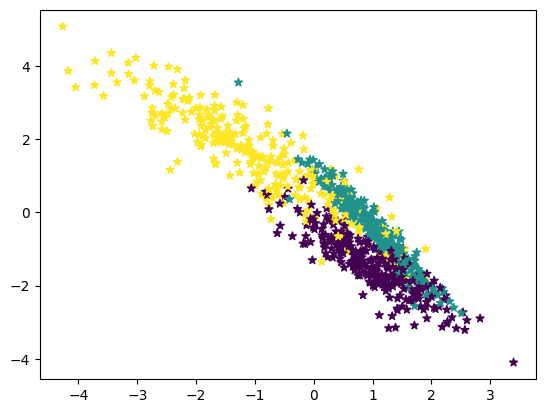

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y, marker="*");

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=125
)

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
# Build a Gaussian Classifier
model = GaussianNB()

In [ ]:
# Model training
model.fit(X_train, y_train)

GaussianNB()

In [ ]:
# Predict Output
predicted = model.predict([X_test[6]])

In [ ]:
print("Actual Value:", y_test[6])

Actual Value: 0


In [ ]:
print("Predicted Value:", predicted[0])

Predicted Value: 0


In [ ]:
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
)

In [ ]:
y_pred = model.predict(X_test)
accuray = accuracy_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test, average="weighted")

In [ ]:
print("Accuracy:", accuray)
print("F1 Score:", f1)

Accuracy: 0.8484848484848485
F1 Score: 0.8491119695890328


In [ ]:
from sklearn.svm import OneClassSVM
from sklearn.covariance import EllipticEnvelope

<Axes: ylabel='avg_glucose_level'>

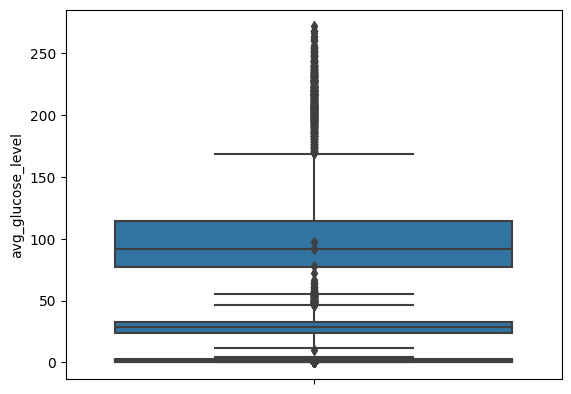

In [ ]:
#to show outliers
sns.boxplot( y='bmi', data=df)
sns.boxplot( y='smoking_status', data=df)
sns.boxplot( y='work_type', data=df)
sns.boxplot( y='ever_married', data=df)
sns.boxplot( y='avg_glucose_level', data=df)


In [ ]:
# calc IQR
qv1=df.bmi.quantile(0.25)
qv3=df.bmi.quantile(0.75)
IQR=qv3-qv1
data=[~((df.bmi>(qv3+1.5*IQR)) |(df.bmi<(qv1-1.5*IQR)))]
data

qv1=df.smoking_status.quantile(0.25)
qv3=df.smoking_status.quantile(0.75)
IQR=qv3-qv1
data=[~((df.smoking_status>(qv3+1.5*IQR)) |(df.smoking_status<(qv1-1.5*IQR)))]
data

qv1=df.avg_glucose_level.quantile(0.25)
qv3=df.avg_glucose_level.quantile(0.75)
IQR=qv3-qv1
data=[~((df.avg_glucose_level>(qv3+1.5*IQR)) |(df.avg_glucose_level<(qv1-1.5*IQR)))]
data


[0       False
 1       False
 2        True
 3       False
 4       False
         ...  
 5105     True
 5106     True
 5107     True
 5108     True
 5109     True
 Name: avg_glucose_level, Length: 5110, dtype: bool]

<Axes: ylabel='bmi'>

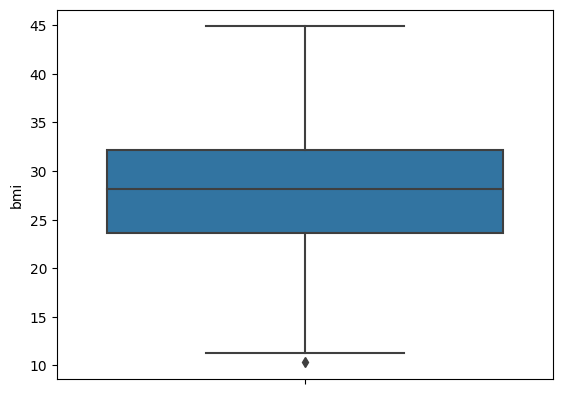

In [ ]:
# remove outliers in "bmi"
df['bmi'].mean()
dat=df[df['bmi']<45]
sns.boxplot(y='bmi',data=dat)


<Axes: ylabel='avg_glucose_level'>

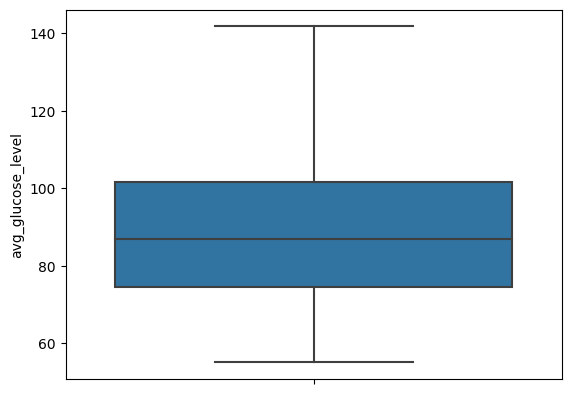

In [ ]:
# remove outliers in "avg_glucose_level"
df['avg_glucose_level'].mean()
dat=df[df['avg_glucose_level']<142]
sns.boxplot(y='avg_glucose_level',data=dat)